**Engy-5310** Computational Continuum Transport Phenomena, UMass Lowell, Chem. Eng. Nuclear Program Spring 2021; Prof. V. F. de Almeida

# Neutron Diffusion on a Spherical Domain in Vacuum
$  
  \newcommand{\Amtrx}{\boldsymbol{\mathsf{A}}}
  \newcommand{\Bmtrx}{\boldsymbol{\mathsf{B}}}
  \newcommand{\Mmtrx}{\boldsymbol{\mathsf{M}}}
  \newcommand{\Imtrx}{\boldsymbol{\mathsf{I}}}
  \newcommand{\Pmtrx}{\boldsymbol{\mathsf{P}}}
  \newcommand{\Lmtrx}{\boldsymbol{\mathsf{L}}}
  \newcommand{\Umtrx}{\boldsymbol{\mathsf{U}}}
  \newcommand{\Smtrx}{\boldsymbol{\mathsf{S}}}
  \newcommand{\xvec}{\boldsymbol{\mathsf{x}}}
  \newcommand{\avec}{\boldsymbol{\mathsf{a}}}
  \newcommand{\bvec}{\boldsymbol{\mathsf{b}}}
  \newcommand{\cvec}{\boldsymbol{\mathsf{c}}}
  \newcommand{\rvec}{\boldsymbol{\mathsf{r}}}
  \newcommand{\fvec}{\boldsymbol{\mathsf{f}}}
  \newcommand{\mvec}{\boldsymbol{\mathsf{m}}}
  \newcommand{\gvec}{\boldsymbol{\mathsf{g}}}
  \newcommand{\zerovec}{\boldsymbol{\mathsf{0}}}
  \newcommand{\norm}[1]{\bigl\lVert{#1}\bigr\rVert}
  \newcommand{\transpose}[1]{{#1}^\top}
  \DeclareMathOperator{\rank}{rank}
  \newcommand{\Reals}{\mathbb{R}}
  \newcommand{\thetavec}{\boldsymbol{\theta}}
$

**Student(s):**  <br>
**Course:** Engy-5310 Computational Continuum Transport Phenomena  <br>
**Mentor:** 

UMass Lowell, Dept. of Chemical Engineering, Nuclear Energy Program 
<br>
**27Mar2021**

---
## Table of Contents<a id="toc"></a>
* [Introduction](#intro)
* [Problem Statement](#problem)
* [Objectives](#obj)
* [Approach](#app)
* [Results and Analysis](#ranalysis)
* [Conclusions](#conclusions)
* [References](#refs)
---

## [Introduction](#toc)<a id="intro"></a>

- Text... 

- Text... 

## [Problem Statement](#toc)<a id="problem"></a>

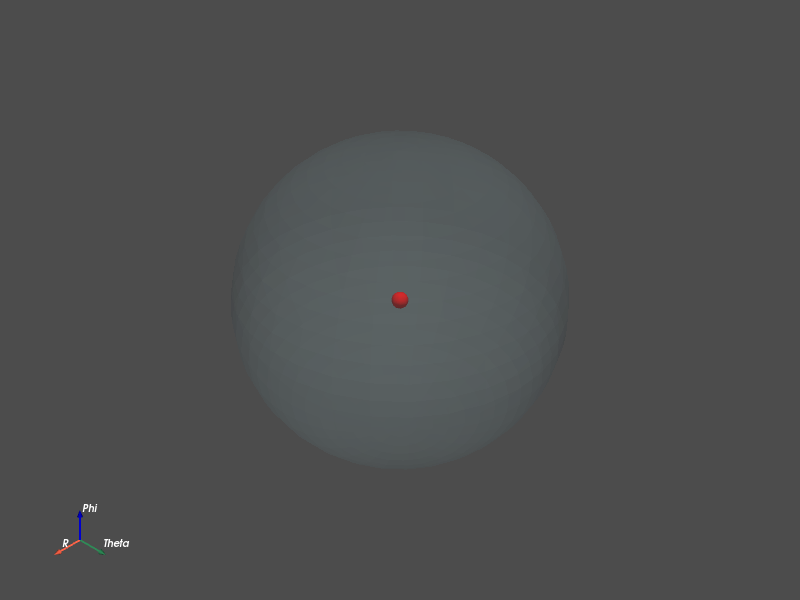

In [3]:
import pyvista as pv
#pv.set_plot_theme('paraview')

radius_i = 1
radius_o = 20 * radius_i
outer = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_o)
inner = pv.Sphere(center=(0,0,0), direction=(0,0,1), radius=radius_i)

plo = pv.Plotter(notebook=True, shape=(1,1)) 

plo.subplot(0,0)
plo.add_mesh(outer, color='lightblue', opacity=0.99,)
plo.add_mesh(inner, color='red', opacity=1)
plo.add_axes(xlabel='R', ylabel='Theta', zlabel='Phi')

cpos = plo.show(window_size=[800, 600])

### [Strong Form of Problem Statement](#toc)<a id="dbcstrong"></a>

The neutron intensity, in the diffusion limit, in a spherical domain with a concentrated finite source at the origin, gives rise to a Poisson model problem for the neutron intensity $I:[a,b]\in\Reals\rightarrow\Reals$ such that:

\begin{align*}
 -\bigl(-D\, I'\bigr)'(r) - \Sigma_a\, I &= 0 \quad \forall \quad r\in [a,b], \\
 q_n(a)^- &= S, \\
 q_n(b)^+ &= \frac{\alpha}{2}\, I.
\end{align*}
   
This problem has an analytical solution for constant values of $D$, $S$, and $\Sigma_a$. The outer boundary condition on the forward normal flux of neutrons implies that the backward normal flux is null, $q_n(b)^- = 0$. The particular value of $\alpha$ depends on the model assumed for the neutron distribution at the outer boundary. The model used here is as follows:

\begin{align*}
\text{Place holder for vacuum model}
\end{align*}

- Text... 

## [Objectives](#toc)<a id="obj"></a>

- Text...

- Text...

## [Approach](#toc)<a id="app"></a>

- Text...

### [Setup](#toc)<a id="setup"></a>

In [ ]:
'''Domain'''

x_left = 0
x_right = 25

x_length = x_right - x_left

In [ ]:
'''Parameters and data'''

diff_coeff = 0.1
source_s = 1e-3

alpha = 3
s_source = 0

In [ ]:
'''FEM Solution'''

n_felem = 10

order = 'first'

n_plot_pts = n_felem + 1

from tools.toolkit import write_engy5310_p1_1d_input_file

write_engy5310_p1_1d_input_file(x_left, x_right, 
                                diff_coeff=diff_coeff,
                                n_felem=n_felem, order=order, 
                                n_plot_pts=n_plot_pts,
                                compute_diffusion_flux=True,
                                file_name='input.hit')

- Text...

## [Results and Analysis](#toc)<a id="ranalysis"></a>

- Text...

In [ ]:
'''Plot function for FEM Solution'''

def plot_solution(df, 
                  title='No Title', 
                  basis_functions_type='No basis functions type',
                  flux_basis_functions_type='No basis functions type'):
    
    import matplotlib.pyplot as plt
    %matplotlib inline
    plt.style.use('dark_background')

    (fig, ax1) = plt.subplots(1, figsize=(14, 5))

    ax1.plot(df['x'], df['u'],'r*-',label=basis_functions_type)

    ax1.set_xlabel(r'$x$ [cm]', fontsize=18)
    ax1.set_ylabel(r'$u_h(x)$ [g/cc]', fontsize=18, color='red')
    ax1.tick_params(axis='y', labelcolor='red', labelsize=14)
    ax1.tick_params(axis='x', labelsize=14)
    ax1.legend(loc='center left', fontsize=12)
    #ax1.set_ylim(0,1)
    ax1.grid(True)

    if 'diffFluxU_x' in df.columns:
        # create a twin x axis to be shared
        ax2 = ax1.twinx()

        ax2.plot(df['x'], df['diffFluxU_x'],'b*-',label=flux_basis_functions_type)

        ax2.set_ylabel(r"$q_h(x)$ [g/cm2-s]", fontsize=16, color='lightblue')
        ax2.tick_params(axis='y', labelcolor='lightblue', labelsize=14)
        ax2.legend(loc='center right', fontsize=12)
        #ax2.set_ylim(0,2)
        #ax2.grid(True)

    plt.title(title, fontsize=20)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()
    print('')

In [ ]:
import pandas as pd
df = pd.read_csv('output2ap1_u_0002.csv')
    
plot_solution(df, title='Dirichlet BC FEM Solution', basis_functions_type='Linear Lagrange', flux_basis_functions_type='Constant Monomial')

- Text...

## [Conclusions](#toc)<a id="conclusions"></a>

- Text...

- Text...

## [References](#toc)<a id="refs"></a>

- [1] V. F. de Almeida, [*Engy-5310: Computational Continuum Transport Phenomena*](https://github.com/dpploy/engy-5310), University of Massachusetts Lowell, Dept. of Chemical Engineering (Nuclear Energy Program).
- [2] Multiphysics Object-Oriented Simulation Environment [(MOOSE)](https://mooseframework.org)
- [3] author, [reference]()
- [4] author, [reference]()